In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people #人脸识别数据库

In [3]:
faces = fetch_lfw_people()

In [5]:
faces.images.shape

(13233, 62, 47)

In [6]:
#获得随机的36张人脸
random_indexes = np.random.permutation(len(faces.data ))  #随机生成一个变量
X = faces.data[random_indexes]   #

In [7]:
example_faces = X[:36,:]  #从x中取出前36张脸
example_faces.shape

(36, 2914)

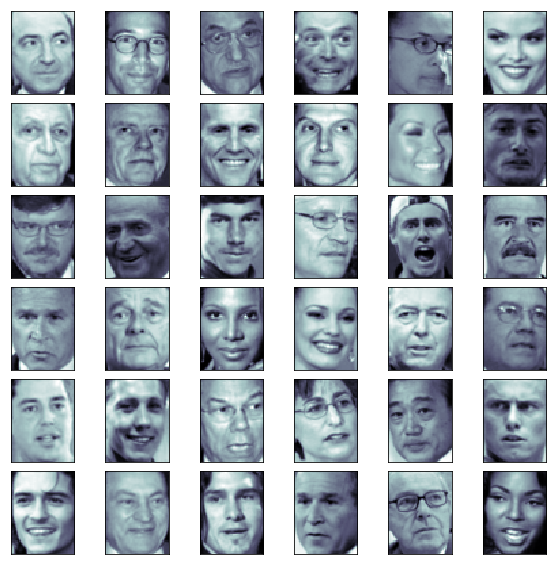

In [15]:
def plot_faces(faces):
    fig, axes = plt.subplots(6,6,figsize = (10,10),
                    subplot_kw ={'xticks':[],'yticks':[]},
    gridspec_kw = dict(hspace =0.1,wspace = 0.1))
    for i ,ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62,47),cmap = 'bone')
    plt.show()
plot_faces(example_faces)                

### 特征脸


In [17]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 1min 47s


In [19]:
pca.components_.shape

(2914, 2914)

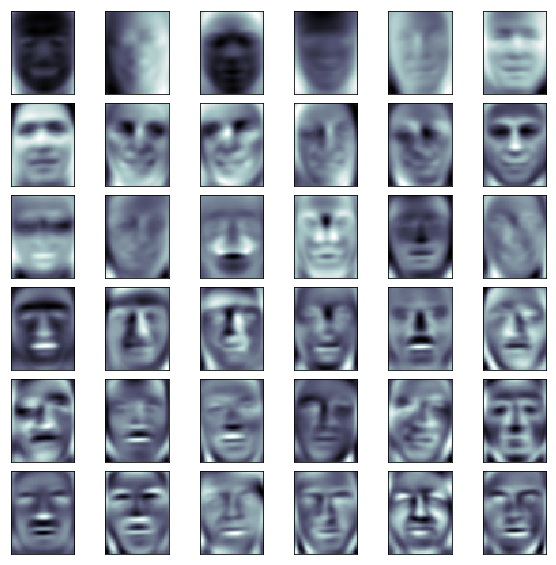

In [20]:
plot_faces(pca.components_[:36,:])

In [22]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [23]:
faces2.data.shape

(1348, 2914)

In [24]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')